In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/10_Oct.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.500000,70.000000,1,1,0,2778.0,2744.0,2782.0,3085.0,3280.0,3160.0,2752.083333,2701.0
1,26.333333,70.500000,1,1,0,2747.0,2758.0,2777.0,3063.0,3255.0,3181.0,2745.083333,2693.0
2,26.166667,71.000000,1,1,0,2743.0,2765.0,2779.0,3061.0,3281.0,3223.0,2736.500000,2676.0
3,26.000000,71.500000,1,1,0,2705.0,2765.0,2763.0,3033.0,3257.0,3226.0,2728.250000,2664.0
4,25.833333,72.000000,2,1,0,2701.0,2778.0,2744.0,3045.0,3241.0,3191.0,2722.000000,2669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,21.622452,82.539116,23,5,1,2176.0,2229.0,2304.0,2158.0,1800.0,2184.0,2193.916667,2138.0
8924,21.622452,82.539116,24,5,1,2143.0,2206.0,2275.0,2140.0,1795.0,2166.0,2180.500000,2114.0
8925,21.622452,82.539116,24,5,1,2153.0,2189.0,2257.0,2108.0,1775.0,2152.0,2165.916667,2082.0
8926,21.400000,82.539116,24,5,1,2141.0,2183.0,2237.0,2111.0,1772.0,2146.0,2153.416667,2087.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.754699,0.013586,0.628430,-1.660902,-1.457338,-1.633145,0.987091,0.882378,0.996948,1.912678,2.466153,1.967466,0.928914
1,0.730431,-0.026307,0.661855,-1.660902,-1.457338,-1.633145,0.892896,0.924982,0.981709,1.844497,2.388562,2.031697,0.907139
2,0.678860,-0.066200,0.695280,-1.660902,-1.457338,-1.633145,0.880742,0.946284,0.987804,1.838299,2.469256,2.160157,0.880438
3,0.642458,-0.106093,0.728706,-1.660902,-1.457338,-1.633145,0.765278,0.946284,0.939039,1.751523,2.394769,2.169333,0.854774
4,0.657625,-0.145986,0.762131,-1.516457,-1.457338,-1.633145,0.753124,0.985844,0.881131,1.788713,2.345111,2.062283,0.835332


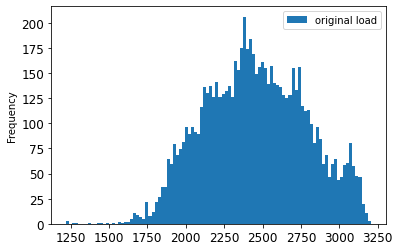

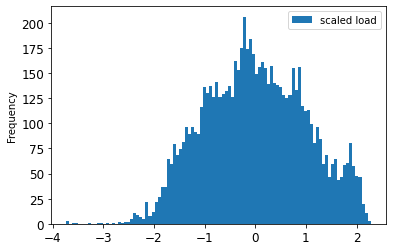

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

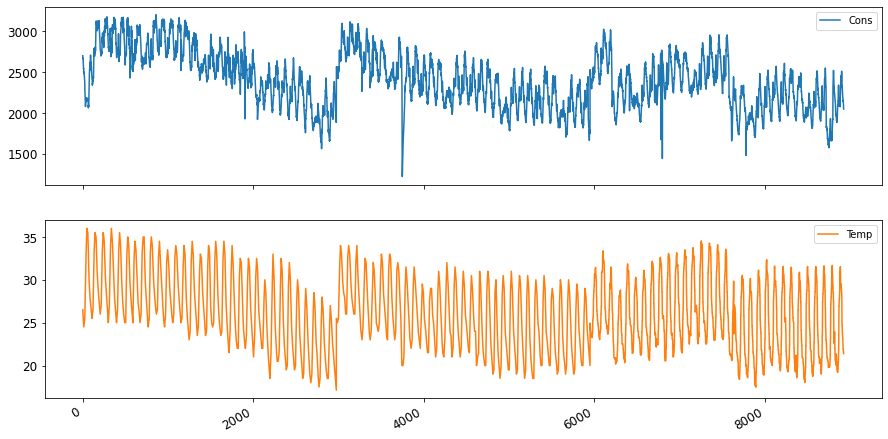

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,0.754699,0.013586,0.628430,-1.660902,-1.457338,-1.633145,0.987091,0.882378,0.996948,1.912678,2.466153,1.967466,0.928914,0.424042
1,0.730431,-0.026307,0.661855,-1.660902,-1.457338,-1.633145,0.892896,0.924982,0.981709,1.844497,2.388562,2.031697,0.907139,0.336069
2,0.678860,-0.066200,0.695280,-1.660902,-1.457338,-1.633145,0.880742,0.946284,0.987804,1.838299,2.469256,2.160157,0.880438,0.248097
3,0.642458,-0.106093,0.728706,-1.660902,-1.457338,-1.633145,0.765278,0.946284,0.939039,1.751523,2.394769,2.169333,0.854774,0.205627
4,0.657625,-0.145986,0.762131,-1.516457,-1.457338,-1.633145,0.753124,0.985844,0.881131,1.788713,2.345111,2.062283,0.835332,0.169224
5,0.587854,-0.185879,0.795556,-1.516457,-1.457338,-1.633145,0.728815,0.891507,0.923800,1.667847,2.205448,1.946056,0.806298,0.084285
6,0.551451,-0.225772,0.828981,-1.516457,-1.457338,-1.633145,0.677160,0.879335,0.945135,1.612062,2.171308,1.958291,0.772338,0.026648
7,0.481680,-0.265665,0.862406,-1.516457,-1.457338,-1.633145,0.640698,0.763696,0.945135,1.556278,2.062681,1.866533,0.732417,-0.024923
8,0.408875,-0.305558,0.895831,-1.372011,-1.457338,-1.633145,0.655890,0.751523,0.984756,1.457106,2.009919,1.793127,0.682903,-0.073459
9,0.275399,-0.345450,0.929257,-1.372011,-1.457338,-1.633145,0.586004,0.727178,0.890274,1.323843,1.910603,1.640197,0.630020,-0.115929


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,0.754699,0.013586,0.628430,-1.660902,-1.457338,-1.633145,0.987091,0.882378,0.996948,1.912678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754699
1,0.730431,-0.026307,0.661855,-1.660902,-1.457338,-1.633145,0.892896,0.924982,0.981709,1.844497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431
2,0.678860,-0.066200,0.695280,-1.660902,-1.457338,-1.633145,0.880742,0.946284,0.987804,1.838299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860
3,0.642458,-0.106093,0.728706,-1.660902,-1.457338,-1.633145,0.765278,0.946284,0.939039,1.751523,...,NaN,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458
4,0.657625,-0.145986,0.762131,-1.516457,-1.457338,-1.633145,0.753124,0.985844,0.881131,1.788713,...,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625
5,0.587854,-0.185879,0.795556,-1.516457,-1.457338,-1.633145,0.728815,0.891507,0.923800,1.667847,...,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854
6,0.551451,-0.225772,0.828981,-1.516457,-1.457338,-1.633145,0.677160,0.879335,0.945135,1.612062,...,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451
7,0.481680,-0.265665,0.862406,-1.516457,-1.457338,-1.633145,0.640698,0.763696,0.945135,1.556278,...,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680
8,0.408875,-0.305558,0.895831,-1.372011,-1.457338,-1.633145,0.655890,0.751523,0.984756,1.457106,...,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680,0.408875
9,0.275399,-0.345450,0.929257,-1.372011,-1.457338,-1.633145,0.586004,0.727178,0.890274,1.323843,...,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680,0.408875,0.275399


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7383,0.684927,-0.057635,0.998699,1.372460,-0.441824,0.612315,0.877704,0.915852,1.210295,0.663729,...,1.006483,0.918510,0.797169,0.888175,0.873007,0.879074,0.794135,0.782001,0.754699,0.684927
7384,0.663693,-0.057635,0.998699,1.516906,-0.441824,0.612315,0.792625,0.794127,1.106669,0.601746,...,0.918510,0.797169,0.888175,0.873007,0.879074,0.794135,0.782001,0.754699,0.684927,0.663693
7385,0.697062,-0.057635,0.998699,1.516906,-0.441824,0.612315,0.780470,0.885421,0.990852,0.533566,...,0.797169,0.888175,0.873007,0.879074,0.794135,0.782001,0.754699,0.684927,0.663693,0.697062
7386,0.715263,-0.109097,1.071738,1.516906,-0.441824,0.612315,0.753124,0.870205,1.003043,0.542863,...,0.888175,0.873007,0.879074,0.794135,0.782001,0.754699,0.684927,0.663693,0.697062,0.715263
7387,0.718296,-0.160559,1.144778,1.516906,-0.441824,0.612315,0.683237,0.876292,0.914657,0.576953,...,0.873007,0.879074,0.794135,0.782001,0.754699,0.684927,0.663693,0.697062,0.715263,0.718296
7388,0.596954,-0.160559,1.144778,1.661352,-0.441824,0.612315,0.661967,0.791084,0.792744,0.511872,...,0.879074,0.794135,0.782001,0.754699,0.684927,0.663693,0.697062,0.715263,0.718296,0.596954
7389,0.548418,-0.160559,1.144778,1.661352,-0.441824,0.612315,0.695391,0.778911,0.884178,0.446790,...,0.794135,0.782001,0.754699,0.684927,0.663693,0.697062,0.715263,0.718296,0.596954,0.548418
7390,0.475613,-0.203643,1.144778,1.661352,-0.441824,0.612315,0.713623,0.751523,0.868939,0.431294,...,0.782001,0.754699,0.684927,0.663693,0.697062,0.715263,0.718296,0.596954,0.548418,0.475613
7391,0.363371,-0.203643,1.232759,1.661352,-0.441824,0.612315,0.716661,0.681531,0.875035,0.372411,...,0.754699,0.684927,0.663693,0.697062,0.715263,0.718296,0.596954,0.548418,0.475613,0.363371
7392,0.299667,-0.203643,1.232759,-1.660902,0.065934,0.612315,0.595119,0.660229,0.789696,0.189562,...,0.684927,0.663693,0.697062,0.715263,0.718296,0.596954,0.548418,0.475613,0.363371,0.299667


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7283,0.763800,-0.083964,1.128787,1.228014,-0.949581,0.612315,1.014438,1.171475,1.234678,0.050101,...,1.206697,1.173328,1.130859,0.976148,0.930645,1.015584,0.915477,0.848739,0.742565,0.763800
7284,0.766833,-0.083964,1.128787,1.372460,-0.949581,0.612315,0.914166,1.128872,1.225534,-0.024278,...,1.173328,1.130859,0.976148,0.930645,1.015584,0.915477,0.848739,0.742565,0.763800,0.766833
7285,0.694028,-0.083964,1.128787,1.372460,-0.949581,0.612315,0.847318,0.973672,1.210295,-0.030476,...,1.130859,0.976148,0.930645,1.015584,0.915477,0.848739,0.742565,0.763800,0.766833,0.694028
7286,0.697062,-0.216808,1.268436,1.372460,-0.949581,0.612315,0.740969,0.928025,1.204200,0.047002,...,0.976148,0.930645,1.015584,0.915477,0.848739,0.742565,0.763800,0.766833,0.694028,0.697062
7287,0.697062,-0.349651,1.408086,1.372460,-0.949581,0.612315,0.762239,1.013233,1.170674,-0.014980,...,0.930645,1.015584,0.915477,0.848739,0.742565,0.763800,0.766833,0.694028,0.697062,0.697062
7288,0.636391,-0.349651,1.408086,1.516906,-0.949581,0.612315,0.765278,0.912809,1.128004,-0.027377,...,1.015584,0.915477,0.848739,0.742565,0.763800,0.766833,0.694028,0.697062,0.697062,0.636391
7289,0.569653,-0.349651,1.408086,1.516906,-0.949581,0.612315,0.692353,0.845860,0.972565,0.025308,...,0.915477,0.848739,0.742565,0.763800,0.766833,0.694028,0.697062,0.697062,0.636391,0.569653
7290,0.578753,-0.326912,1.390561,1.516906,-0.949581,0.612315,0.695391,0.739351,0.926848,0.071795,...,0.848739,0.742565,0.763800,0.766833,0.694028,0.697062,0.697062,0.636391,0.569653,0.578753
7291,0.612122,-0.304173,1.373037,1.516906,-0.949581,0.612315,0.695391,0.760653,1.012187,0.102787,...,0.742565,0.763800,0.766833,0.694028,0.697062,0.697062,0.636391,0.569653,0.578753,0.612122
7292,0.548418,-0.304173,1.373037,1.661352,-0.949581,0.612315,0.634620,0.763696,0.911609,0.071795,...,0.763800,0.766833,0.694028,0.697062,0.697062,0.636391,0.569653,0.578753,0.612122,0.548418


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.125030
11,-0.143231
12,-0.194801
13,-0.340412
14,-0.267606
...,...
7288,0.596954
7289,0.548418
7290,0.475613
7291,0.363371


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,0.287533,-0.385343,0.962682,-1.372011,-1.457338,-1.633145,0.549541,0.675445,0.878083,1.342438,1.805079,1.533147,0.579211
11,0.284499,-0.425236,0.996107,-1.372011,-1.457338,-1.633145,0.479655,0.638927,0.762266,1.271158,1.786457,1.545381,0.537993
12,0.208660,-0.465129,1.029532,-1.227565,-1.457338,-1.633145,0.406730,0.654143,0.750074,1.221572,1.767835,1.517854,0.491331
13,0.172258,-0.445183,1.012820,-1.227565,-1.457338,-1.633145,0.273034,0.584151,0.725692,1.178184,1.625068,1.401627,0.443632
14,0.096419,-0.425236,0.996107,-1.227565,-1.457338,-1.633145,0.285188,0.547633,0.673879,1.131697,1.562996,1.444447,0.393860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,0.636391,-0.349651,1.408086,1.516906,-0.949581,0.612315,0.765278,0.912809,1.128004,-0.027377,0.079460,0.193484,0.823666
7289,0.569653,-0.349651,1.408086,1.516906,-0.949581,0.612315,0.692353,0.845860,0.972565,0.025308,0.169465,0.101726,0.788929
7290,0.578753,-0.326912,1.390561,1.516906,-0.949581,0.612315,0.695391,0.739351,0.926848,0.071795,0.203605,0.208777,0.758858
7291,0.612122,-0.304173,1.373037,1.516906,-0.949581,0.612315,0.695391,0.760653,1.012187,0.102787,0.169465,0.245480,0.724380


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,2520.0,25.592451,79.040030,1.0,4.0,1.0,2633.0,2682.0,2710.0,2499.0,2396.0,2438.0,2636.916667
7394,2537.0,25.052451,81.540122,1.0,4.0,1.0,2609.0,2688.0,2701.0,2485.0,2393.0,2435.0,2623.250000
7395,2498.0,24.512451,84.040215,1.0,4.0,1.0,2572.0,2689.0,2678.0,2472.0,2371.0,2426.0,2608.250000
7396,2507.0,24.512451,84.040215,2.0,4.0,1.0,2551.0,2649.0,2671.0,2451.0,2368.0,2426.0,2594.583333
7397,2489.0,24.512451,84.040215,2.0,4.0,1.0,2520.0,2633.0,2682.0,2413.0,2346.0,2398.0,2578.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,2145.0,20.942451,84.504820,24.0,6.0,1.0,2179.0,2204.0,2265.0,2193.0,2162.0,2141.0,2203.333333
8350,2140.0,20.252450,84.504820,24.0,6.0,1.0,2194.0,2211.0,2263.0,2185.0,2156.0,2124.0,2193.083333
8351,2124.0,20.252450,88.121990,24.0,6.0,1.0,2191.0,2208.0,2248.0,2168.0,2138.0,2113.0,2182.750000
8352,2075.0,20.252450,88.121990,1.0,7.0,0.0,2177.0,2188.0,2232.0,2128.0,2088.0,2058.0,2169.666667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1.121753,0.172067,0.872770,-1.658081,-0.170444,0.502925,1.520294,1.680783,1.763739,0.856237,0.399760,0.497798,1.576530
7394,1.183651,0.045857,1.017937,-1.658081,-0.170444,0.502925,1.433222,1.702426,1.731469,0.809191,0.390016,0.487937,1.525495
7395,1.041651,-0.080353,1.163104,-1.658081,-0.170444,0.502925,1.298987,1.706033,1.649003,0.765505,0.318567,0.458355,1.469481
7396,1.074420,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.222800,1.561749,1.623905,0.694936,0.308824,0.458355,1.418445
7397,1.008881,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.110333,1.504035,1.663345,0.567238,0.237374,0.366322,1.358386
7398,0.830471,-0.123592,1.226985,-1.513750,-0.170444,0.502925,1.172008,1.417465,1.684858,0.500029,0.191906,0.287437,1.281210
7399,0.848676,-0.166831,1.290867,-1.513750,-0.170444,0.502925,1.030518,1.284002,1.688444,0.520192,0.208144,0.224986,1.205280
7400,0.812265,-0.166831,1.290867,-1.369419,-0.170444,0.502925,1.063169,1.208253,1.545024,0.493308,0.100970,0.201978,1.138685
7401,0.761291,-0.166831,1.290867,-1.369419,-0.170444,0.502925,0.997866,1.096433,1.487657,0.348809,0.039263,0.159248,1.072713
7402,0.772214,-0.290704,1.328418,-1.369419,-0.170444,0.502925,0.820095,1.157754,1.401605,0.392495,0.049006,0.093510,1.015142


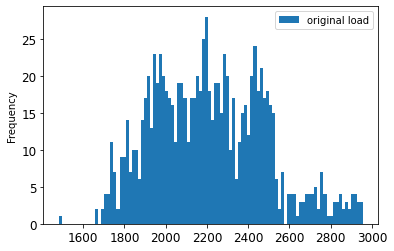

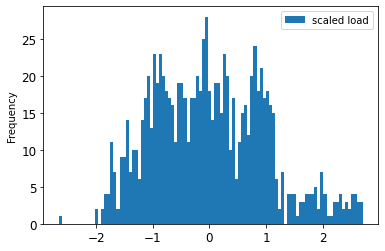

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,1.121753,0.172067,0.872770,-1.658081,-0.170444,0.502925,1.520294,1.680783,1.763739,0.856237,0.399760,0.497798,1.576530,1.041651
7394,1.183651,0.045857,1.017937,-1.658081,-0.170444,0.502925,1.433222,1.702426,1.731469,0.809191,0.390016,0.487937,1.525495,0.961548
7395,1.041651,-0.080353,1.163104,-1.658081,-0.170444,0.502925,1.298987,1.706033,1.649003,0.765505,0.318567,0.458355,1.469481,0.888727
7396,1.074420,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.222800,1.561749,1.623905,0.694936,0.308824,0.458355,1.418445,0.896009
7397,1.008881,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.110333,1.504035,1.663345,0.567238,0.237374,0.366322,1.358386,0.797701
7398,0.830471,-0.123592,1.226985,-1.513750,-0.170444,0.502925,1.172008,1.417465,1.684858,0.500029,0.191906,0.287437,1.281210,0.746727
7399,0.848676,-0.166831,1.290867,-1.513750,-0.170444,0.502925,1.030518,1.284002,1.688444,0.520192,0.208144,0.224986,1.205280,0.717598
7400,0.812265,-0.166831,1.290867,-1.369419,-0.170444,0.502925,1.063169,1.208253,1.545024,0.493308,0.100970,0.201978,1.138685,0.568316
7401,0.761291,-0.166831,1.290867,-1.369419,-0.170444,0.502925,0.997866,1.096433,1.487657,0.348809,0.039263,0.159248,1.072713,0.539188
7402,0.772214,-0.290704,1.328418,-1.369419,-0.170444,0.502925,0.820095,1.157754,1.401605,0.392495,0.049006,0.093510,1.015142,0.317085


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,1.121753,0.172067,0.872770,-1.658081,-0.170444,0.502925,1.520294,1.680783,1.763739,0.856237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121753
7394,1.183651,0.045857,1.017937,-1.658081,-0.170444,0.502925,1.433222,1.702426,1.731469,0.809191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651
7395,1.041651,-0.080353,1.163104,-1.658081,-0.170444,0.502925,1.298987,1.706033,1.649003,0.765505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651
7396,1.074420,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.222800,1.561749,1.623905,0.694936,...,NaN,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420
7397,1.008881,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.110333,1.504035,1.663345,0.567238,...,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881
7398,0.830471,-0.123592,1.226985,-1.513750,-0.170444,0.502925,1.172008,1.417465,1.684858,0.500029,...,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471
7399,0.848676,-0.166831,1.290867,-1.513750,-0.170444,0.502925,1.030518,1.284002,1.688444,0.520192,...,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676
7400,0.812265,-0.166831,1.290867,-1.369419,-0.170444,0.502925,1.063169,1.208253,1.545024,0.493308,...,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265
7401,0.761291,-0.166831,1.290867,-1.369419,-0.170444,0.502925,0.997866,1.096433,1.487657,0.348809,...,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265,0.761291
7402,0.772214,-0.290704,1.328418,-1.369419,-0.170444,0.502925,0.820095,1.157754,1.401605,0.392495,...,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265,0.761291,0.772214


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8244,0.371700,0.169730,-0.316561,1.372873,0.386687,0.502925,0.569765,0.937721,1.398020,0.123658,...,0.896009,0.961548,0.703034,0.637496,0.633855,0.579239,0.495495,0.429957,0.429957,0.371700
8245,0.226059,0.169730,-0.316561,1.372873,0.386687,0.502925,0.486322,0.681617,1.197233,0.096775,...,0.961548,0.703034,0.637496,0.633855,0.579239,0.495495,0.429957,0.429957,0.371700,0.226059
8246,0.273392,0.001449,-0.147409,1.372873,0.386687,0.502925,0.421018,0.616690,1.068156,0.043008,...,0.703034,0.637496,0.633855,0.579239,0.495495,0.429957,0.429957,0.371700,0.226059,0.273392
8247,0.251546,-0.166831,0.021742,1.372873,0.386687,0.502925,0.421018,0.613083,0.860198,-0.030922,...,0.637496,0.633855,0.579239,0.495495,0.429957,0.429957,0.371700,0.226059,0.273392,0.251546
8248,0.065853,-0.166831,0.021742,1.517204,0.386687,0.502925,0.362971,0.558976,0.924737,-0.064527,...,0.633855,0.579239,0.495495,0.429957,0.429957,0.371700,0.226059,0.273392,0.251546,0.065853
8249,0.054930,-0.166831,0.021742,1.517204,0.386687,0.502925,0.217852,0.476013,0.670167,-0.084690,...,0.579239,0.495495,0.429957,0.429957,0.371700,0.226059,0.273392,0.251546,0.065853,0.054930
8250,0.094981,-0.455478,0.353933,1.517204,0.386687,0.502925,0.265016,0.411085,0.605629,-0.081329,...,0.495495,0.429957,0.429957,0.371700,0.226059,0.273392,0.251546,0.065853,0.054930,0.094981
8251,0.014879,-0.744125,0.686124,1.517204,0.386687,0.502925,0.243248,0.411085,0.602043,-0.121655,...,0.429957,0.429957,0.371700,0.226059,0.273392,0.251546,0.065853,0.054930,0.094981,0.014879
8252,0.044007,-0.744125,0.686124,1.661535,0.386687,0.502925,0.058221,0.353372,0.548261,-0.209027,...,0.429957,0.371700,0.226059,0.273392,0.251546,0.065853,0.054930,0.094981,0.014879,0.044007
8253,-0.068865,-0.744125,0.686124,1.661535,0.386687,0.502925,0.047337,0.209088,0.465795,-0.276236,...,0.371700,0.226059,0.273392,0.251546,0.065853,0.054930,0.094981,0.014879,0.044007,-0.068865


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,0.280674
7404,0.186007
7405,0.113187
7406,0.124110
7407,0.091340
...,...
8249,-0.243635
8250,-0.261840
8251,-0.320097
8252,-0.498507


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7403,0.699393,-0.414577,1.365968,-1.369419,-0.170444,0.502925,0.838235,1.017077,1.268943,0.372332,0.026272,0.054068,0.962862
7404,0.630214,-0.414577,1.365968,-1.225087,-0.170444,0.502925,0.801955,1.049541,1.193647,0.352169,-0.041930,-0.044539,0.911205
7405,0.659342,-0.414577,1.365968,-1.225087,-0.170444,0.502925,0.751164,0.984613,1.082498,0.295042,-0.035434,-0.037965,0.871684
7406,0.612008,-0.430937,1.390749,-1.225087,-0.170444,0.502925,0.762048,0.807866,1.143451,0.274879,-0.058168,-0.051113,0.822827
7407,0.601085,-0.447298,1.415531,-1.225087,-0.170444,0.502925,0.689488,0.825901,1.003617,0.274879,-0.080902,-0.054400,0.785173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,0.054930,-0.166831,0.021742,1.517204,0.386687,0.502925,0.217852,0.476013,0.670167,-0.084690,-0.233545,-0.646040,0.369733
8250,0.094981,-0.455478,0.353933,1.517204,0.386687,0.502925,0.265016,0.411085,0.605629,-0.081329,-0.207563,-0.550720,0.323366
8251,0.014879,-0.744125,0.686124,1.517204,0.386687,0.502925,0.243248,0.411085,0.602043,-0.121655,-0.233545,-0.540859,0.270463
8252,0.044007,-0.744125,0.686124,1.661535,0.386687,0.502925,0.058221,0.353372,0.548261,-0.209027,-0.279013,-0.590163,0.224718


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=500,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
15/15 [==============================] - 1s 96ms/step - loss: 1.1532 - val_loss: 0.8340
Epoch 2/300
15/15 [==============================] - 1s 41ms/step - loss: 0.8403 - val_loss: 0.7470
Epoch 3/300
15/15 [==============================] - 1s 41ms/step - loss: 0.6018 - val_loss: 0.7878
Epoch 4/300
15/15 [==============================] - 1s 39ms/step - loss: 0.5022 - val_loss: 0.8745
Epoch 5/300
15/15 [==============================] - 1s 41ms/step - loss: 0.4911 - val_loss: 0.8201
Epoch 6/300
15/15 [==============================] - 1s 39ms/step - loss: 0.4870 - val_loss: 0.8373
Epoch 7/300
15/15 [==============================] - 1s 38ms/step - loss: 0.4819 - val_loss: 0.8467
Training time: 8.81650424003601s


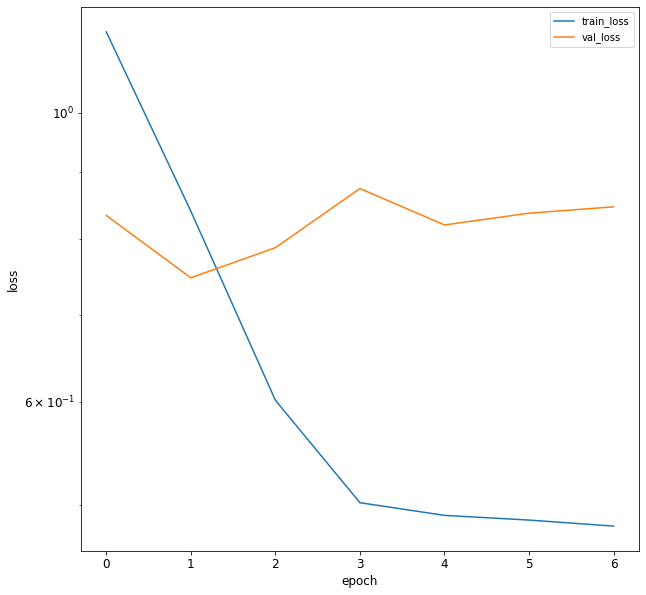

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,2050.0,19.897451,88.707785,1.0,7.0,0.0,2140.0,2194.0,2211.0,2087.0,2062.0,2036.0,2144.833333
8355,2038.0,19.542452,89.293580,1.0,7.0,0.0,2124.0,2191.0,2208.0,2088.0,2046.0,2015.0,2130.666667
8356,2007.0,19.542452,89.293580,2.0,7.0,0.0,2075.0,2177.0,2188.0,2056.0,2033.0,2007.0,2115.583333
8357,1994.0,19.542452,89.293580,2.0,7.0,0.0,2067.0,2145.0,2179.0,2066.0,2027.0,1996.0,2100.166667
8358,1985.0,19.407452,89.199140,2.0,7.0,0.0,2050.0,2140.0,2194.0,2043.0,2014.0,1973.0,2082.750000
8359,1957.0,19.272451,89.104700,2.0,7.0,0.0,2038.0,2124.0,2191.0,2029.0,1998.0,1961.0,2063.250000
8360,1967.0,19.272451,89.104700,3.0,7.0,0.0,2007.0,2075.0,2177.0,2028.0,1982.0,1940.0,2045.750000
8361,1958.0,19.272451,89.104700,3.0,7.0,0.0,1994.0,2067.0,2145.0,2016.0,1974.0,1947.0,2030.166667
8362,1949.0,20.157452,82.680825,3.0,7.0,0.0,1985.0,2050.0,2140.0,2004.0,1974.0,1935.0,2014.250000
8363,1950.0,21.042452,76.256950,3.0,7.0,0.0,1957.0,2038.0,2124.0,1989.0,1968.0,1920.0,1999.750000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


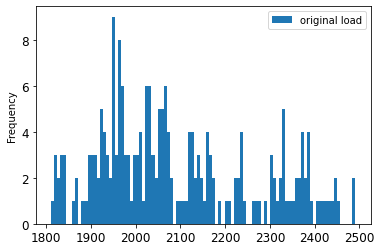

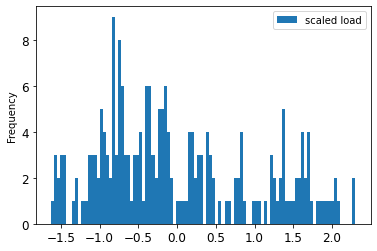

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.246443,-0.837383,1.295338,-1.498364,1.114783,-0.340279,0.251993,0.542999,0.618429,-0.633948,-0.784034,-0.876913,0.277281,-0.743527
8355,-0.315803,-0.918190,1.329310,-1.498364,1.114783,-0.340279,0.157908,0.524946,0.599926,-0.628676,-0.866947,-0.990231,0.189713,-0.726187
8356,-0.494985,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.130226,0.440695,0.476572,-0.797390,-0.934314,-1.033400,0.096478,-0.836008
8357,-0.570126,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.177269,0.248124,0.421062,-0.744667,-0.965407,-1.092757,0.001183,-0.934269
8358,-0.622146,-0.948920,1.323833,-1.357685,1.114783,-0.340279,-0.277234,0.218034,0.513578,-0.865931,-1.032774,-1.216866,-0.106474,-0.841788
8359,-0.783987,-0.979650,1.318356,-1.357685,1.114783,-0.340279,-0.347798,0.121748,0.495075,-0.939743,-1.115687,-1.281619,-0.227009,-0.922709
8360,-0.726187,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.530087,-0.173127,0.408727,-0.945016,-1.198601,-1.394937,-0.335182,-0.963169
8361,-0.778207,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.606531,-0.221270,0.211360,-1.008284,-1.240057,-1.357164,-0.431507,-1.032530
8362,-0.830228,-0.778200,0.945812,-1.217006,1.114783,-0.340279,-0.659454,-0.323574,0.180522,-1.071552,-1.240057,-1.421917,-0.529893,-1.032530
8363,-0.824448,-0.576750,0.573268,-1.217006,1.114783,-0.340279,-0.824102,-0.395789,0.081838,-1.150637,-1.271150,-1.502858,-0.619521,-1.055650


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-0.246443,-0.837383,1.295338,-1.498364,1.114783,-0.340279,0.251993,0.542999,0.618429,-0.633948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443
8355,-0.315803,-0.918190,1.329310,-1.498364,1.114783,-0.340279,0.157908,0.524946,0.599926,-0.628676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803
8356,-0.494985,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.130226,0.440695,0.476572,-0.797390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985
8357,-0.570126,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.177269,0.248124,0.421062,-0.744667,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126
8358,-0.622146,-0.948920,1.323833,-1.357685,1.114783,-0.340279,-0.277234,0.218034,0.513578,-0.865931,...,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146
8359,-0.783987,-0.979650,1.318356,-1.357685,1.114783,-0.340279,-0.347798,0.121748,0.495075,-0.939743,...,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987
8360,-0.726187,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.530087,-0.173127,0.408727,-0.945016,...,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187
8361,-0.778207,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.606531,-0.221270,0.211360,-1.008284,...,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207
8362,-0.830228,-0.778200,0.945812,-1.217006,1.114783,-0.340279,-0.659454,-0.323574,0.180522,-1.071552,...,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228
8363,-0.824448,-0.576750,0.573268,-1.217006,1.114783,-0.340279,-0.824102,-0.395789,0.081838,-1.150637,...,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228,-0.824448


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8461,-1.032530,-1.134436,0.947202,-1.076327,-0.952278,-0.340279,-0.976990,-0.762879,-0.473255,-1.430070,...,-0.494985,-0.668386,-0.743527,-0.726187,-0.836008,-0.934269,-0.841788,-0.922709,-0.963169,-1.032530
8462,-1.032530,-1.156061,0.961963,-1.076327,-0.952278,-0.340279,-0.882905,-0.841111,-0.497926,-1.493338,...,-0.668386,-0.743527,-0.726187,-0.836008,-0.934269,-0.841788,-0.922709,-0.963169,-1.032530,-1.032530
8463,-1.055650,-1.177685,0.976724,-1.076327,-0.952278,-0.340279,-0.965229,-0.823057,-0.621280,-1.509155,...,-0.743527,-0.726187,-0.836008,-0.934269,-0.841788,-0.922709,-0.963169,-1.032530,-1.032530,-1.055650
8464,-1.148131,-1.177685,0.976724,-0.935648,-0.952278,-0.340279,-1.006391,-0.937397,-0.639783,-1.514427,...,-0.726187,-0.836008,-0.934269,-0.841788,-0.922709,-0.963169,-1.032530,-1.032530,-1.055650,-1.148131
8465,-1.171251,-1.177685,0.976724,-0.935648,-0.952278,-0.340279,-1.076955,-1.039701,-0.824814,-1.493338,...,-0.836008,-0.934269,-0.841788,-0.922709,-0.963169,-1.032530,-1.032530,-1.055650,-1.148131,-1.171251


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-1.148131
8365,-1.171251
8366,-1.130790
8367,-1.148131
8368,-1.055650
...,...
8461,-1.512274
8462,-1.477594
8463,-1.442913
8464,-1.292632


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8364,-0.922709,-0.576750,0.573268,-1.076327,1.114783,-0.340279,-0.765299,-0.582343,-0.220379,-1.166454,-1.374791,-1.486670,-0.692667
8365,-0.905369,-0.576750,0.573268,-1.076327,1.114783,-0.340279,-0.818222,-0.660575,-0.269721,-1.224449,-1.333335,-1.529839,-0.760146
8366,-0.974729,-0.558539,0.551648,-1.076327,1.114783,-0.340279,-0.871144,-0.714736,-0.374572,-1.256083,-1.452523,-1.616176,-0.825049
8367,-0.992069,-0.540329,0.530029,-1.076327,1.114783,-0.340279,-0.865264,-0.883236,-0.448584,-1.208632,-1.582075,-1.556819,-0.885317
8368,-0.997849,-0.540329,0.530029,-0.935648,1.114783,-0.340279,-0.965229,-0.823057,-0.639783,-1.203360,-1.540618,-1.578404,-0.930131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.032530,-1.134436,0.947202,-1.076327,-0.952278,-0.340279,-0.976990,-0.762879,-0.473255,-1.430070,-1.234875,-1.308600,-0.847714
8462,-1.032530,-1.156061,0.961963,-1.076327,-0.952278,-0.340279,-0.882905,-0.841111,-0.497926,-1.493338,-1.265968,-1.432709,-0.907466
8463,-1.055650,-1.177685,0.976724,-1.076327,-0.952278,-0.340279,-0.965229,-0.823057,-0.621280,-1.509155,-1.219329,-1.567611,-0.958977
8464,-1.148131,-1.177685,0.976724,-0.935648,-0.952278,-0.340279,-1.006391,-0.937397,-0.639783,-1.514427,-1.214147,-1.524443,-1.017184


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.8880507946014404s


In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2092.636792
dtype: float64
Cons    173.418364
dtype: float64


In [46]:
load_mean=2092.636792
load_std=173.418364
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


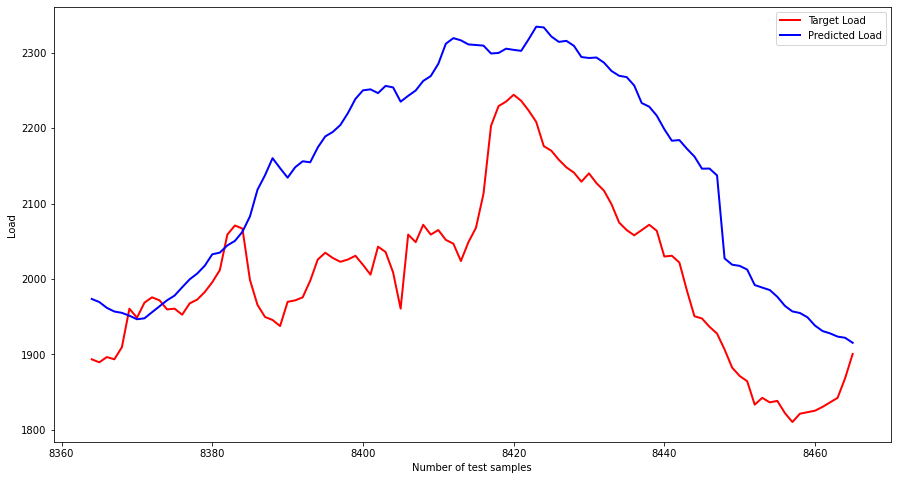

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

6.90854550738045


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -6.811926
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  189248.760475
8365  188847.805981
8366  189550.254343
8367  189249.638561
8368  190854.386178
...             ...
8461  182932.575157
8462  183534.511335
8463  184136.505908
8464  186744.199376
8465  189953.858296

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364   6399.715719
8365   6396.035812
8366   4258.873281
8367   4015.933346
8368   2076.099530
...            ...
8461  10130.525081
8462   8373.046140
8463   6596.729292
8464   2873.156014
8465    221.907862

[102 rows x 1 columns]
y_t+100    24585.668279
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    156.798177
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1973.5281]
[1969.4956]
[1961.797]
[1956.9012]
[1955.132]
[1951.3386]
[1946.6519]
[1947.8904]
[1955.9667]
[1963.8679]
[1971.7915]
[1978.0731]
[1989.0214]
[1999.6001]
[2007.2694]
[2017.6248]
[2032.791]
[2035.0029]
[2044.5723]
[2050.5151]
[2062.624]
[2083.027]
[2118.36]
[2137.6526]
[2160.2441]
[2147.0093]
[2134.4062]
[2148.1794]
[2156.1191]
[2154.8252]
[2174.4631]
[2189.152]
[2195.0847]
[2204.2302]
[2219.9922]
[2238.8247]
[2250.1992]
[2251.5505]
[2246.538]
[2256.082]
[2254.1365]
[2235.2063]
[2242.9153]
[2250.019]
[2262.7175]
[2269.1765]
[2285.3313]
[2312.0242]
[2319.4639]
[2316.5251]
[2311.1265]
[2310.3313]
[2309.5269]
[2299.0962]
[2299.8179]
[2305.4634]
[2303.9133]
[2302.573]
[2318.0688]
[2334.6365]
[2333.6897]
[2321.688]
[2314.4788]
[2315.8628]
[2309.2878]
[2294.3584]
[2293.1409]
[2293.739]
[2286.886]
[2275.8264]
[2269.5256]
[2267.7986]
[2256.7266]
[2233.3923]
[2228.5508]
[2216.6328]
[2198.7083]
[2183.367]
[2184.2727]
[2172.76]
[2162.418]
[2146.3071]
[2146.4978]
[2137.3628]
[2027.3201]